# Dataset 4: crypto.csv

## Dalam pengerjaan ini, penulis menggunakan distribusi lognormal. Keputusan ini diambil penulis karena mengamati bahwa jika semua nilai dalam data di-logaritma-kan dengan logaritma natural, terbentuk sebuah distribusi normal. Selain itu, distribusi data nilai crypto memiliki nilai skew yang positif (akan ditunjukkan).

## Import library-library yang penting:

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import lognorm

## Baca file crypto.csv, kemudian load dalam notebook. Kemudian, buat sebuah kolom lognorm untuk menyimpan nilai-nilai crypto yang telah dilogaritma sebagai pembuktian distribusi lognormal

In [45]:
data = pd.read_csv('crypto.csv', delimiter=',')
data.columns = ['Nilai crypto']
data['lognorm'] = np.log(data) # perform logarithmic conversion to all values, see if distribution becomes normal
data

Nilai crypto    lognorm
0           0.000023 -10.701995
1           0.000033 -10.334270
2           0.000037 -10.191170
3           0.000037 -10.197859
4           0.000037 -10.211372
5           0.000036 -10.238960
6           0.000073  -9.528482
7           0.000072  -9.538844
8           0.000073  -9.528482
9           0.000067  -9.618309
10          0.000069  -9.585034
11          0.000082  -9.408791
12          0.000113  -9.085913
13          0.000111  -9.103731
14          0.000112  -9.094782
15          0.000124  -8.999269
16          0.000124  -8.997247
17          0.000113  -9.085913
18          0.000109  -9.126459
19          0.000098  -9.233097
20          0.000090  -9.321272
21          0.000086  -9.361163
22          0.000085  -9.375805
23          0.000085  -9.372859
24          0.000084  -9.381722
25          0.000082  -9.408791
26          0.000081  -9.424153
27          0.000060  -9.725341
28          0.000037 -10.197859
29          0.000034 -10.296530
...              ...        ...
632187      0.113194  -2.178648
632188      0.087992  -2.430509
632189      0.101825  -2.284497
632190      0.334725  -1.094445
632191      0.690254  -0.370695
632192      0.625767  -0.468777
632193      0.230924  -1.465664
632194      0.114744  -2.165050
632195      0.089624  -2.412129
632196      0.143865  -1.938882
632197      0.112651  -2.183463
632198      0.126489  -2.067600
632199      0.145279  -1.929101
632200      0.132727  -2.019461
632201      0.126085  -2.070801
632202      0.225772  -1.488229
632203      0.129094  -2.047213
632204      0.228046  -1.478208
632205      0.323451  -1.128707
632206      0.073590  -2.609243
632207      0.074413  -2.598118
632208      0.061524  -2.788328
632209      0.130473  -2.036593
632210      0.211989  -1.551222
632211      0.070326  -2.654614
632212      0.045676  -3.086188
632213      0.057948  -2.848201
632214      0.082787  -2.491478
632215      0.091944  -2.386578
632216      0.089511  -2.413397

[632217 rows x 2 columns]

## Buat representasi data

### Boxplot:

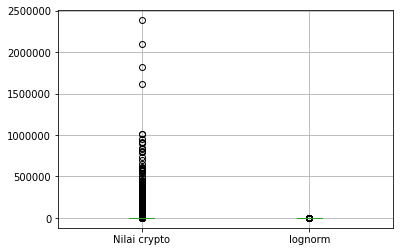

In [46]:
data.plot.box(grid = True)

### Data nilai crypto dalam histogram

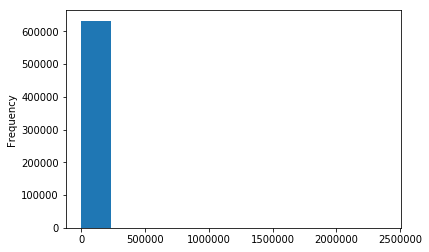

In [47]:
data['Nilai crypto'].plot(kind='hist')

### Nilai lognorm dalam histogram. Terlihat bahwa terbentuk graf seperti distribusi normal

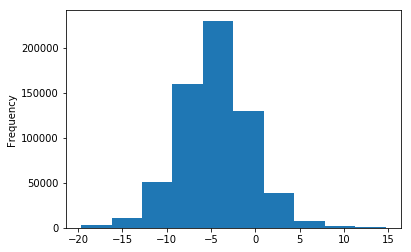

In [48]:
data['lognorm'].plot(kind='hist')

### Nilai maksimum, nilai minimum, mean, median, dan standard deviation dari data crypto dan lognormnya. Terlihat bahwa nilai mean dan median dari lognormnya hampir sama.

In [49]:
data.describe() # cari max, min, mean, median, std

Nilai crypto        lognorm
count  6.322170e+05  632217.000000
mean   2.030185e+02      -4.616917
std    8.678740e+03       3.961606
min    2.925000e-09     -19.649971
25%    8.070000e-04      -7.122187
50%    9.733500e-03      -4.632182
75%    1.198205e-01      -2.121760
max    2.383502e+06      14.684082

### Mencari nilai skew dari data crypto. Terlihat bahwa nilai skew positif

In [50]:
data['Nilai crypto'].skew()

118.23951408752912

### Mencari nilai skew dari lognorm. Terlihat bahwa nilai skew dari lognorm mendekati 0.

In [51]:
data['lognorm'].skew()

0.011696740090619617

### Mencari nilai kurtosis dari data nilai crypto.

In [52]:
data['Nilai crypto'].kurtosis()

22297.435590867655

### Mencari nilai kurtosis dari data lognorm. Terlihat bahwa nilai kurtosis tersebut juga mendekati 0.

In [53]:
data['lognorm'].kurtosis()

0.7310820509911164

#### Dari fakta bahwa data lognormnya memiliki nilai skew dan kurtosis yang mendekati 0, memiliki graf yang mirip normal dan nilai mean dan mediannya mendekati, serta data nilai crypto yang nilai skew-nya positif, maka dapat disimpulkan bahwa distribusi nilai crypto adalah lognorm.

### Variansi nilai crypto

In [54]:
data['Nilai crypto'].var()

75320534.28415908

### Modus nilai crypto

In [55]:
data['Nilai crypto'].mode()

0    0.000002
dtype: float64

## Simpan nilai standard deviation dan mean untuk pengerjaan soal

In [66]:
stddev = data['Nilai crypto'].std()

In [70]:
mean = data['Nilai crypto'].mean()

## Pengerjaan soal a - i

### Hitung hasil *cumulative distribution function* dari fungsi lognormal dengan x = 0.177013, kemudian hasil dikalikan dengan 1000 (asumsi: setiap harga *cryptocurrency* baru independen)

In [105]:
(lognorm.cdf(0.177013, stddev, 0, math.exp(mean))) * 1000

490.58897359186244

## Pengerjaan soal a - ii

### Hitung hasil CDF dari fungsi longnormal dengan x = 177.013, kemudian hitung 1 dikurangi hasil tersebut. Hasil selanjutnya dikalikan dengan 1000 dengan asumsi yang sama seperti di atas.

In [106]:
(1 - lognorm.cdf(177.013, stddev, 0, math.exp(mean))) * 1000

509.0935777590604

## Pengerjaan soal b - i

### Hitung hasil CDF dari fungsi longnormal dengan x = 0.013, kemudian hitung 1 dikurangi hasil tersebut.

In [107]:
1 - lognorm.cdf(0.013, stddev, 0, math.exp(mean))

0.5095310269962715

## Pengerjaan soal b - ii

### Hitung hasil CDF dari fungsi longnormal dengan x = 17.7

In [108]:
lognorm.cdf(17.7, stddev, 0, math.exp(mean))

0.4908006019995162